In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('stars.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [22]:
df.columns = df.columns.str.replace(' ', '_') 

In [23]:
df.head()

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_(K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute_magnitude(Mv)  240 non-null    float64
 4   Star_type               240 non-null    int64  
 5   Star_color              240 non-null    object 
 6   Spectral_Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [25]:
df.describe()

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [32]:
df['Star_type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star_type, dtype: int64

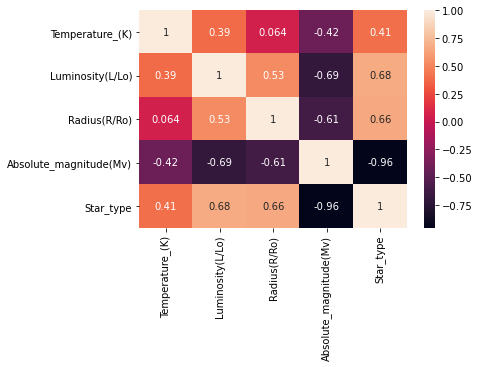

In [26]:
sns.heatmap(data = df.corr(), annot = True)

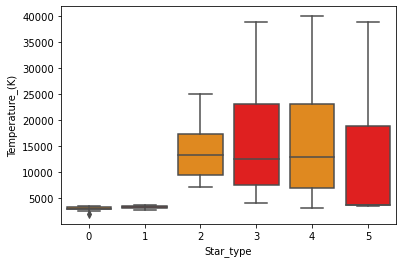

In [27]:
sns.boxplot(x="Star_type", y="Temperature_(K)",
             palette=["darkorange", "red"],
            data=df)


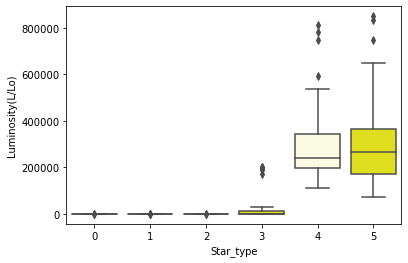

In [28]:
sns.boxplot(x="Star_type", y="Luminosity(L/Lo)",
             palette=["lightyellow", "yellow"],
            data=df)

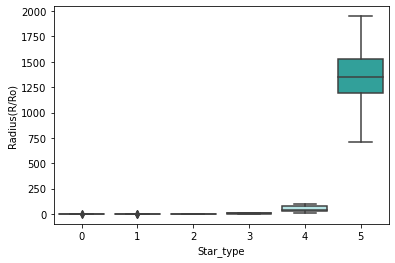

In [29]:
sns.boxplot(x="Star_type", y="Radius(R/Ro)",
             palette=["paleturquoise", "lightseagreen"],
            data=df)

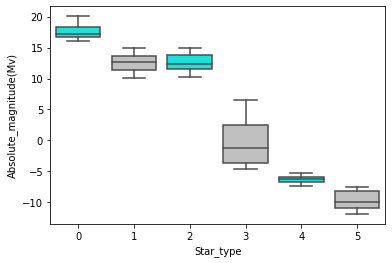

In [31]:
sns.boxplot(x="Star_type", y="Absolute_magnitude(Mv)",
             palette=["aqua", "silver"],
            data=df)

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns.values:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [35]:
from sklearn.model_selection import train_test_split

X=df.drop('Star_type',axis=1)
y=df['Star_type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=18)
                                

In [36]:
X

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,10,5
1,3042,0.000500,0.1542,16.60,10,5
2,2600,0.000300,0.1020,18.70,10,5
3,2800,0.000200,0.1600,16.65,10,5
4,1939,0.000138,0.1030,20.06,10,5
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6
236,30839,834042.000000,1194.0000,-10.63,0,6
237,8829,537493.000000,1423.0000,-10.73,11,0
238,9235,404940.000000,1112.0000,-11.23,11,0


In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star_type, Length: 240, dtype: int64

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(rescaledX_train,y_train)

LogisticRegression()

In [40]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(rescaledX_test)
print("Accuracy of logistic regression classifier: ", lr.score(rescaledX_test,y_test))
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.9583333333333334


array([[11,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  0,  8,  2,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [42]:
rfc.fit(rescaledX_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = rfc.predict(rescaledX_test)

print("Accuracy of random forest classifier: ", rfc.score(rescaledX_test,y_test))

confusion_matrix(y_test,y_pred)

Accuracy of random forest classifier:  1.0


array([[11,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [44]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 0.97368421, 1.        , 1.        ])